# Explore HSR data
Stefan/Yuzhao Heng
Since Tues. Oct. 12th, 2021

Check the types, format and content for HSR robot's laser scan output, see `scripts/util` for the type.


## Setup

In [1]:
import os
import numpy as np
from math import isclose
from icecream import ic

from util import *
from scripts.util import json_load

os.chdir('../data')

fnms = !ls

## A rather static recording
Note that each object in the JSON file is a list of LaserScan objects.



In [2]:
scans = json_load(fnms[0])


## Check attributes in single scan



ic| ks: ['header.seq',
         'header.stamp.secs',
         'header.stamp.nsecs',
         'header.frame_id',
         'angle_min',
         'angle_max',
         'angle_increment',
         'time_increment',
         'scan_time',
         'range_min',
         'ranges',
         'intensities']
ic| n_beams: 963
ic| intens[:10]: array([ 827., 1088., 1402., 1540., 1679., 1681., 1724., 1749., 1825.,
                        1863.])
    ranges[:10]: array([1.71099997, 1.75100005, 1.778     , 1.78499997, 1.79700005,
                        1.81500006, 1.824     , 1.829     , 1.83200002, 1.83200002])


header.seq           134710
header.stamp.secs    1633995068
header.stamp.nsecs   214782575
header.frame_id      base_
angle_min            -2.0987584590911865
angle_max            2.0987584590911865
angle_increment      0.004363323096185923
time_increment       1.736111516947858e-05
scan_time            0.02500000037252903
range_min            0.019999999552965164
ranges               [1.7109999656677246, 1.7510000467300415, 1.777999997138977, 1.784999966621399, 1.7970000505447388]
intensities          [827.0, 1088.0, 1402.0, 1540.0, 1679.0]


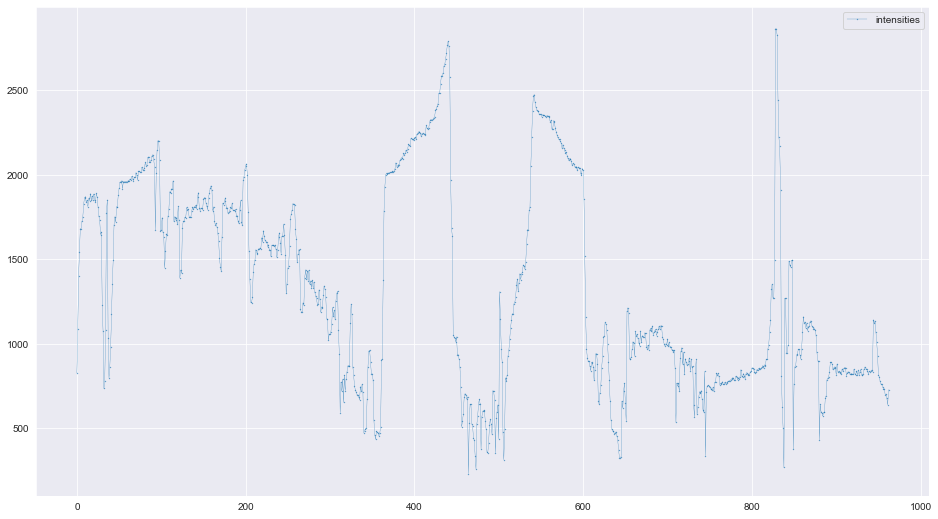

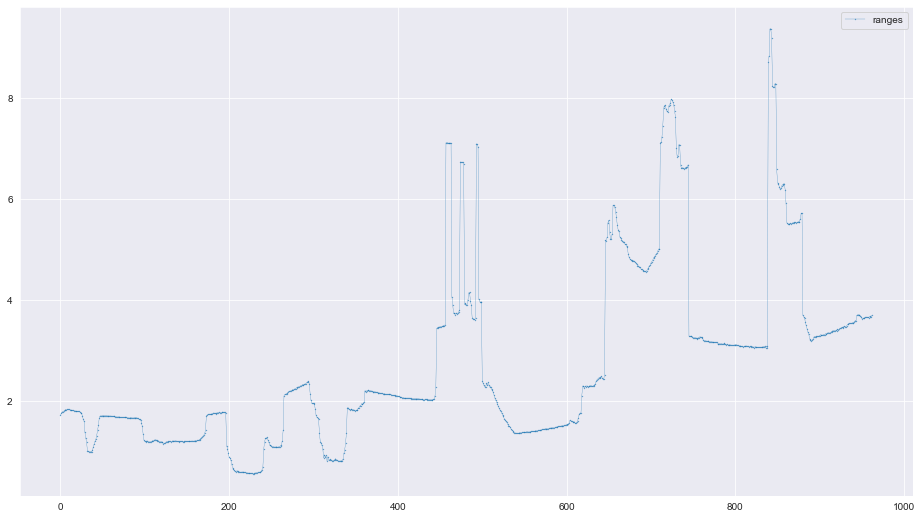

TypeError: plot_laser() missing 2 required positional arguments: 'a_max' and 'a_min'

In [3]:
s = scans[0]
ks = list(keys(s))

ic(ks)
pp(s)

n_beams = ((s['angle_max'] - s['angle_min']) / s['angle_increment']) + 1
assert isclose(n_beams, round(n_beams), abs_tol=1e-4)
n_beams = int(n_beams)
ic(n_beams)

intens = np.array(s['intensities'])
ranges = np.array(s['ranges'])
assert n_beams == intens.size and n_beams == ranges.size

ic(intens[:10], ranges[:10])

plot_1d(intens, label='intensities')
plot_1d(ranges, label='ranges')

plot_laser(s)

## Across consecutive scans


### A snapshot of each key



In [ ]:
ic(len(scans))

def map_scans(key):
    return np.vectorize(lambda x: get(x, key))(scans)

keys_arr = list(filter(lambda k: type(get(s, k)) is list, ks))
ic(keys_arr)

for k in keys(s):
    if k not in keys_arr:
        ic(k)
        arr = map_scans(k)
        ic(arr[:10])

### Study each sequence



In [ ]:

k = 'header.stamp.secs'
secs = map_scans(k)
d = np.diff(secs)
idxs = np.where(d == 1)[0]
ic(np.diff(idxs))  # i.e. 40 samples per second

k = 'header.stamp.nsecs'
nsecs = map_scans(k)
plot_1d(nsecs, label=k)

for k in ['header.frame_id', 'angle_min', 'angle_max', 'angle_increment']:
    assert_arr_same(map_scans(k))

k = 'time_increment'
time_increments = map_scans(k)
assert_arr_same(time_increments)
ti = time_increments[0]
ic(round(1 / ti))  # By doc, "time between measurements", what does this mean?

k = 'scan_time'
scan_times = map_scans(k)
assert_arr_same(scan_times)
st = scan_times[0]
assert round(1 / st) == 40

k = 'range_min'
range_mins = map_scans(k)
assert_arr_same(range_mins)
ic(range_mins[0])  # In meters per doc